In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ruta='/content/drive/MyDrive/Colab Notebooks/'
df=pd.read_csv(ruta+'Países.csv')
df.head()

,Países
0,MEX
1,CHN
2,CAN
3,POL
4,CPV


# Criterio de selección de Pareto

In [ ]:
# Cardinalidad de la variable 'Países'
n=df['Países'].nunique()
n,0.2*n

(91, 18.2)

In [ ]:
# Si el 20% de la categorías está en el 80% de las observaciones, consideramos mushas categorías
n_obs=df.shape[0]
n_obs,0.8*n_obs

(560, 448.0)

<Axes: xlabel='Países'>

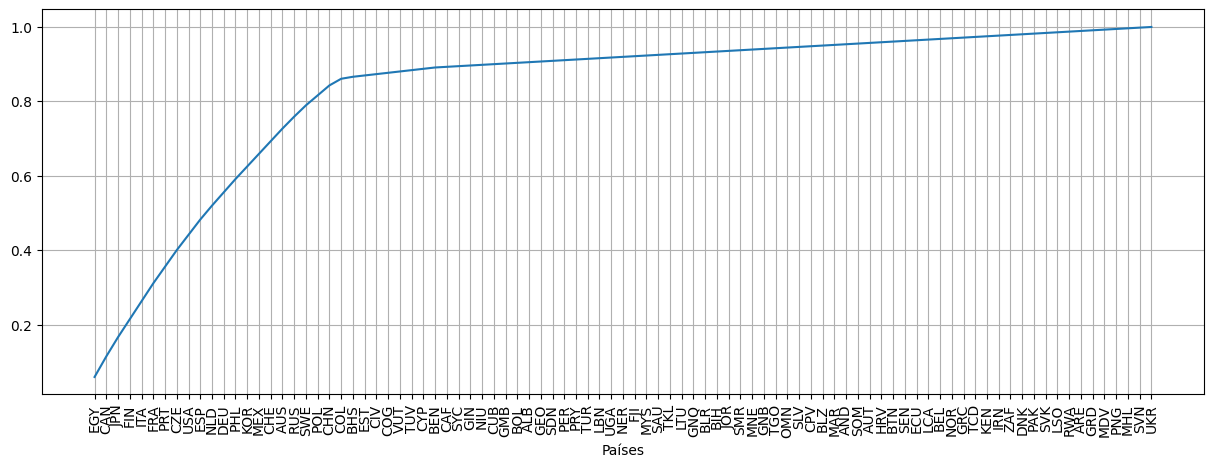

In [ ]:
df_conteo=df['Países'].value_counts()
plt.figure(figsize=(15,5))
(df_conteo.cumsum()/n_obs).plot(grid=True,xticks=range(n),rot=90)

In [ ]:
np.where(df_conteo.cumsum()/n_obs>0.8)[0][0] # Primer index que satisface la condición

19

# Funciones Hash

In [ ]:
m=20 # Al menos el 80% de las observaciones
keys_aparicion={país:ID for ID,país in enumerate(df['Países'].unique())}
keys_aparicion

{'MEX': 0,
 'CHN': 1,
 'CAN': 2,
 'POL': 3,
 'CPV': 4,
 'PHL': 5,
 'EGY': 6,
 'FIN': 7,
 'ITA': 8,
 'AUS': 9,
 'CZE': 10,
 'BLZ': 11,
 'FRA': 12,
 'RUS': 13,
 'MAR': 14,
 'ESP': 15,
 'CIV': 16,
 'AND': 17,
 'SOM': 18,
 'CHE': 19,
 'AUT': 20,
 'BHS': 21,
 'JPN': 22,
 'PRT': 23,
 'KOR': 24,
 'COL': 25,
 'USA': 26,
 'NLD': 27,
 'HRV': 28,
 'SWE': 29,
 'DEU': 30,
 'BEN': 31,
 'BTN': 32,
 'SEN': 33,
 'ECU': 34,
 'LCA': 35,
 'BEL': 36,
 'NOR': 37,
 'GRC': 38,
 'TCD': 39,
 'KEN': 40,
 'IRN': 41,
 'CYP': 42,
 'ZAF': 43,
 'DNK': 44,
 'TGO': 45,
 'PAK': 46,
 'SVK': 47,
 'LSO': 48,
 'RWA': 49,
 'ARE': 50,
 'GRD': 51,
 'MDV': 52,
 'PNG': 53,
 'MHL': 54,
 'SVN': 55,
 'SLV': 56,
 'OMN': 57,
 'TUV': 58,
 'GNB': 59,
 'PER': 60,
 'SDN': 61,
 'GEO': 62,
 'ALB': 63,
 'BOL': 64,
 'GMB': 65,
 'CUB': 66,
 'GIN': 67,
 'VUT': 68,
 'COG': 69,
 'SYC': 70,
 'CAF': 71,
 'PRY': 72,
 'LBN': 73,
 'UGA': 74,
 'NER': 75,
 'TUR': 76,
 'MYS': 77,
 'SAU': 78,
 'TKL': 79,
 'EST': 80,
 'LTU': 81,
 'GNQ': 82,
 'BLR': 83,
 '

In [ ]:
keys_conteo={país:orden for orden,país in enumerate(df['Países'].value_counts().index)}
keys_conteo

{'EGY': 0,
 'CAN': 1,
 'JPN': 2,
 'FIN': 3,
 'ITA': 4,
 'FRA': 5,
 'PRT': 6,
 'CZE': 7,
 'USA': 8,
 'ESP': 9,
 'NLD': 10,
 'DEU': 11,
 'PHL': 12,
 'KOR': 13,
 'MEX': 14,
 'CHE': 15,
 'AUS': 16,
 'RUS': 17,
 'SWE': 18,
 'POL': 19,
 'CHN': 20,
 'COL': 21,
 'BHS': 22,
 'EST': 23,
 'CIV': 24,
 'COG': 25,
 'VUT': 26,
 'TUV': 27,
 'CYP': 28,
 'BEN': 29,
 'CAF': 30,
 'SYC': 31,
 'GIN': 32,
 'NIU': 33,
 'CUB': 34,
 'GMB': 35,
 'BOL': 36,
 'ALB': 37,
 'GEO': 38,
 'SDN': 39,
 'PER': 40,
 'PRY': 41,
 'TUR': 42,
 'LBN': 43,
 'UGA': 44,
 'NER': 45,
 'FJI': 46,
 'MYS': 47,
 'SAU': 48,
 'TKL': 49,
 'LTU': 50,
 'GNQ': 51,
 'BLR': 52,
 'BIH': 53,
 'JOR': 54,
 'SMR': 55,
 'MNE': 56,
 'GNB': 57,
 'TGO': 58,
 'OMN': 59,
 'SLV': 60,
 'CPV': 61,
 'BLZ': 62,
 'MAR': 63,
 'AND': 64,
 'SOM': 65,
 'AUT': 66,
 'HRV': 67,
 'BTN': 68,
 'SEN': 69,
 'ECU': 70,
 'LCA': 71,
 'BEL': 72,
 'NOR': 73,
 'GRC': 74,
 'TCD': 75,
 'KEN': 76,
 'IRN': 77,
 'ZAF': 78,
 'DNK': 79,
 'PAK': 80,
 'SVK': 81,
 'LSO': 82,
 'RWA': 83,
 '

In [ ]:
# Función Hash 1
#
# f = ID mod m
hashes_aparicion={país:ID%m for país,ID in keys_aparicion.items()}
hashes_aparicion

{'MEX': 0,
 'CHN': 1,
 'CAN': 2,
 'POL': 3,
 'CPV': 4,
 'PHL': 5,
 'EGY': 6,
 'FIN': 7,
 'ITA': 8,
 'AUS': 9,
 'CZE': 10,
 'BLZ': 11,
 'FRA': 12,
 'RUS': 13,
 'MAR': 14,
 'ESP': 15,
 'CIV': 16,
 'AND': 17,
 'SOM': 18,
 'CHE': 19,
 'AUT': 0,
 'BHS': 1,
 'JPN': 2,
 'PRT': 3,
 'KOR': 4,
 'COL': 5,
 'USA': 6,
 'NLD': 7,
 'HRV': 8,
 'SWE': 9,
 'DEU': 10,
 'BEN': 11,
 'BTN': 12,
 'SEN': 13,
 'ECU': 14,
 'LCA': 15,
 'BEL': 16,
 'NOR': 17,
 'GRC': 18,
 'TCD': 19,
 'KEN': 0,
 'IRN': 1,
 'CYP': 2,
 'ZAF': 3,
 'DNK': 4,
 'TGO': 5,
 'PAK': 6,
 'SVK': 7,
 'LSO': 8,
 'RWA': 9,
 'ARE': 10,
 'GRD': 11,
 'MDV': 12,
 'PNG': 13,
 'MHL': 14,
 'SVN': 15,
 'SLV': 16,
 'OMN': 17,
 'TUV': 18,
 'GNB': 19,
 'PER': 0,
 'SDN': 1,
 'GEO': 2,
 'ALB': 3,
 'BOL': 4,
 'GMB': 5,
 'CUB': 6,
 'GIN': 7,
 'VUT': 8,
 'COG': 9,
 'SYC': 10,
 'CAF': 11,
 'PRY': 12,
 'LBN': 13,
 'UGA': 14,
 'NER': 15,
 'TUR': 16,
 'MYS': 17,
 'SAU': 18,
 'TKL': 19,
 'EST': 0,
 'LTU': 1,
 'GNQ': 2,
 'BLR': 3,
 'FJI': 4,
 'NIU': 5,
 'MNE': 6,
 'S

In [ ]:
hashes_conteo={país:ID%m for país,ID in keys_conteo.items()}
hashes_conteo

{'EGY': 0,
 'CAN': 1,
 'JPN': 2,
 'FIN': 3,
 'ITA': 4,
 'FRA': 5,
 'PRT': 6,
 'CZE': 7,
 'USA': 8,
 'ESP': 9,
 'NLD': 10,
 'DEU': 11,
 'PHL': 12,
 'KOR': 13,
 'MEX': 14,
 'CHE': 15,
 'AUS': 16,
 'RUS': 17,
 'SWE': 18,
 'POL': 19,
 'CHN': 0,
 'COL': 1,
 'BHS': 2,
 'EST': 3,
 'CIV': 4,
 'COG': 5,
 'VUT': 6,
 'TUV': 7,
 'CYP': 8,
 'BEN': 9,
 'CAF': 10,
 'SYC': 11,
 'GIN': 12,
 'NIU': 13,
 'CUB': 14,
 'GMB': 15,
 'BOL': 16,
 'ALB': 17,
 'GEO': 18,
 'SDN': 19,
 'PER': 0,
 'PRY': 1,
 'TUR': 2,
 'LBN': 3,
 'UGA': 4,
 'NER': 5,
 'FJI': 6,
 'MYS': 7,
 'SAU': 8,
 'TKL': 9,
 'LTU': 10,
 'GNQ': 11,
 'BLR': 12,
 'BIH': 13,
 'JOR': 14,
 'SMR': 15,
 'MNE': 16,
 'GNB': 17,
 'TGO': 18,
 'OMN': 19,
 'SLV': 0,
 'CPV': 1,
 'BLZ': 2,
 'MAR': 3,
 'AND': 4,
 'SOM': 5,
 'AUT': 6,
 'HRV': 7,
 'BTN': 8,
 'SEN': 9,
 'ECU': 10,
 'LCA': 11,
 'BEL': 12,
 'NOR': 13,
 'GRC': 14,
 'TCD': 15,
 'KEN': 16,
 'IRN': 17,
 'ZAF': 18,
 'DNK': 19,
 'PAK': 0,
 'SVK': 1,
 'LSO': 2,
 'RWA': 3,
 'ARE': 4,
 'GRD': 5,
 'MDV': 6,
 'P

In [ ]:
df['Hash_aparicion']=df['Países'].map(hashes_aparicion)
df['Hash_conteo']=df['Países'].map(hashes_conteo)
df.head()

,Países,Hash_aparicion,Hash_conteo
0,MEX,0,14
1,CHN,1,0
2,CAN,2,1
3,POL,3,19
4,CPV,4,1


In [ ]:
# Función Hash 2
#
# Valores para 'a' y 'b' arbitrarios
a=5
b=4
hash_congruencial={pais:(a*ID+b)%m for pais,ID in keys_conteo.items()}
hash_congruencial

{'EGY': 4,
 'CAN': 9,
 'JPN': 14,
 'FIN': 19,
 'ITA': 4,
 'FRA': 9,
 'PRT': 14,
 'CZE': 19,
 'USA': 4,
 'ESP': 9,
 'NLD': 14,
 'DEU': 19,
 'PHL': 4,
 'KOR': 9,
 'MEX': 14,
 'CHE': 19,
 'AUS': 4,
 'RUS': 9,
 'SWE': 14,
 'POL': 19,
 'CHN': 4,
 'COL': 9,
 'BHS': 14,
 'EST': 19,
 'CIV': 4,
 'COG': 9,
 'VUT': 14,
 'TUV': 19,
 'CYP': 4,
 'BEN': 9,
 'CAF': 14,
 'SYC': 19,
 'GIN': 4,
 'NIU': 9,
 'CUB': 14,
 'GMB': 19,
 'BOL': 4,
 'ALB': 9,
 'GEO': 14,
 'SDN': 19,
 'PER': 4,
 'PRY': 9,
 'TUR': 14,
 'LBN': 19,
 'UGA': 4,
 'NER': 9,
 'FJI': 14,
 'MYS': 19,
 'SAU': 4,
 'TKL': 9,
 'LTU': 14,
 'GNQ': 19,
 'BLR': 4,
 'BIH': 9,
 'JOR': 14,
 'SMR': 19,
 'MNE': 4,
 'GNB': 9,
 'TGO': 14,
 'OMN': 19,
 'SLV': 4,
 'CPV': 9,
 'BLZ': 14,
 'MAR': 19,
 'AND': 4,
 'SOM': 9,
 'AUT': 14,
 'HRV': 19,
 'BTN': 4,
 'SEN': 9,
 'ECU': 14,
 'LCA': 19,
 'BEL': 4,
 'NOR': 9,
 'GRC': 14,
 'TCD': 19,
 'KEN': 4,
 'IRN': 9,
 'ZAF': 14,
 'DNK': 19,
 'PAK': 4,
 'SVK': 9,
 'LSO': 14,
 'RWA': 19,
 'ARE': 4,
 'GRD': 9,
 'MDV': 14,


In [ ]:
# Usamos el teorema de Hull-Dobell para que los generadores aleatorios congruenciales lineales sean completos
m=20
a=21
b=13
hash_congruencial={pais:(a*ID+b)%m for pais,ID in keys_conteo.items()}
hash_congruencial

{'EGY': 13,
 'CAN': 14,
 'JPN': 15,
 'FIN': 16,
 'ITA': 17,
 'FRA': 18,
 'PRT': 19,
 'CZE': 0,
 'USA': 1,
 'ESP': 2,
 'NLD': 3,
 'DEU': 4,
 'PHL': 5,
 'KOR': 6,
 'MEX': 7,
 'CHE': 8,
 'AUS': 9,
 'RUS': 10,
 'SWE': 11,
 'POL': 12,
 'CHN': 13,
 'COL': 14,
 'BHS': 15,
 'EST': 16,
 'CIV': 17,
 'COG': 18,
 'VUT': 19,
 'TUV': 0,
 'CYP': 1,
 'BEN': 2,
 'CAF': 3,
 'SYC': 4,
 'GIN': 5,
 'NIU': 6,
 'CUB': 7,
 'GMB': 8,
 'BOL': 9,
 'ALB': 10,
 'GEO': 11,
 'SDN': 12,
 'PER': 13,
 'PRY': 14,
 'TUR': 15,
 'LBN': 16,
 'UGA': 17,
 'NER': 18,
 'FJI': 19,
 'MYS': 0,
 'SAU': 1,
 'TKL': 2,
 'LTU': 3,
 'GNQ': 4,
 'BLR': 5,
 'BIH': 6,
 'JOR': 7,
 'SMR': 8,
 'MNE': 9,
 'GNB': 10,
 'TGO': 11,
 'OMN': 12,
 'SLV': 13,
 'CPV': 14,
 'BLZ': 15,
 'MAR': 16,
 'AND': 17,
 'SOM': 18,
 'AUT': 19,
 'HRV': 0,
 'BTN': 1,
 'SEN': 2,
 'ECU': 3,
 'LCA': 4,
 'BEL': 5,
 'NOR': 6,
 'GRC': 7,
 'TCD': 8,
 'KEN': 9,
 'IRN': 10,
 'ZAF': 11,
 'DNK': 12,
 'PAK': 13,
 'SVK': 14,
 'LSO': 15,
 'RWA': 16,
 'ARE': 17,
 'GRD': 18,
 'MDV': 

In [ ]:
df['Congruencial']=df['Países'].map(hash_congruencial)
df

,Países,Hash_aparicion,Hash_conteo,Congruencial
0,MEX,0,14,7
1,CHN,1,0,13
2,CAN,2,1,14
3,POL,3,19,12
4,CPV,4,1,14
...,...,...,...,...
555,UKR,10,10,3
556,EGY,6,0,13
557,CHE,19,15,8
558,FRA,12,5,18


In [ ]:
df.apply(lambda x: x.nunique())

,0
Países,91
Hash_aparicion,20
Hash_conteo,20
Congruencial,20


In [ ]:
# Función Hash 3
# Agrupamos el conteo de cada categoría en orden de frecuencia (de mayor a menor)
#
m=20 # :)
df_conteo # hash_1 = 33 + 15 + 1 + 1 + ...

,count
Países,
EGY,33
CAN,31
JPN,29
FIN,27
ITA,27
...,...
MDV,1
PNG,1
MHL,1


In [ ]:
df_conteo.iloc[20],df_conteo.iloc[40],df_conteo.iloc[60]

(15, 1, 1)

In [ ]:
p_hash = []
for i in range(m):
  conteo = 0
  for j in range(i,len(df_conteo),m):
    conteo += df_conteo.iloc[j]
  p_hash.append(conteo)
p_hash

[51,
 44,
 35,
 32,
 32,
 32,
 30,
 30,
 28,
 28,
 25,
 23,
 23,
 22,
 22,
 22,
 22,
 21,
 20,
 18]

In [ ]:
hash_sum = {}

for i, pais in enumerate(keys_conteo):
  mod = (i // m) * m
  hash_sum[pais] = p_hash[i - mod]

hash_sum

{'EGY': 51,
 'CAN': 44,
 'JPN': 35,
 'FIN': 32,
 'ITA': 32,
 'FRA': 32,
 'PRT': 30,
 'CZE': 30,
 'USA': 28,
 'ESP': 28,
 'NLD': 25,
 'DEU': 23,
 'PHL': 23,
 'KOR': 22,
 'MEX': 22,
 'CHE': 22,
 'AUS': 22,
 'RUS': 21,
 'SWE': 20,
 'POL': 18,
 'CHN': 51,
 'COL': 44,
 'BHS': 35,
 'EST': 32,
 'CIV': 32,
 'COG': 32,
 'VUT': 30,
 'TUV': 30,
 'CYP': 28,
 'BEN': 28,
 'CAF': 25,
 'SYC': 23,
 'GIN': 23,
 'NIU': 22,
 'CUB': 22,
 'GMB': 22,
 'BOL': 22,
 'ALB': 21,
 'GEO': 20,
 'SDN': 18,
 'PER': 51,
 'PRY': 44,
 'TUR': 35,
 'LBN': 32,
 'UGA': 32,
 'NER': 32,
 'FJI': 30,
 'MYS': 30,
 'SAU': 28,
 'TKL': 28,
 'LTU': 25,
 'GNQ': 23,
 'BLR': 23,
 'BIH': 22,
 'JOR': 22,
 'SMR': 22,
 'MNE': 22,
 'GNB': 21,
 'TGO': 20,
 'OMN': 18,
 'SLV': 51,
 'CPV': 44,
 'BLZ': 35,
 'MAR': 32,
 'AND': 32,
 'SOM': 32,
 'AUT': 30,
 'HRV': 30,
 'BTN': 28,
 'SEN': 28,
 'ECU': 25,
 'LCA': 23,
 'BEL': 23,
 'NOR': 22,
 'GRC': 22,
 'TCD': 22,
 'KEN': 22,
 'IRN': 21,
 'ZAF': 20,
 'DNK': 18,
 'PAK': 51,
 'SVK': 44,
 'LSO': 35,
 'RW

In [ ]:
df['Ayon']=df['Países'].map(hash_sum)
df.apply(lambda x: x.nunique())

,0
Países,91
Hash_aparicion,20
Hash_conteo,20
Congruencial,20
Ayon,12


In [ ]:
# Función Hash 4
# MurMurHash3
#
from sklearn.feature_extraction import FeatureHasher

In [ ]:
hasher=FeatureHasher(n_features=20)
m_hasher = hasher.fit_transform([keys_conteo])
m_hasher.toarray()

array([[ -98.,   94.,   59.,    7.,   69., -207.,  139.,  -44.,   21.,
         -40.,  -38.,  -50.,   29., -251.,  264.,   86.,   19., -208.,
         136.,  272.]])

In [ ]:
murmurhash={pais:m_hasher[0,ID%m] for pais,ID in keys_conteo.items()}
murmurhash

{'EGY': -98.0,
 'CAN': 94.0,
 'JPN': 59.0,
 'FIN': 7.0,
 'ITA': 69.0,
 'FRA': -207.0,
 'PRT': 139.0,
 'CZE': -44.0,
 'USA': 21.0,
 'ESP': -40.0,
 'NLD': -38.0,
 'DEU': -50.0,
 'PHL': 29.0,
 'KOR': -251.0,
 'MEX': 264.0,
 'CHE': 86.0,
 'AUS': 19.0,
 'RUS': -208.0,
 'SWE': 136.0,
 'POL': 272.0,
 'CHN': -98.0,
 'COL': 94.0,
 'BHS': 59.0,
 'EST': 7.0,
 'CIV': 69.0,
 'COG': -207.0,
 'VUT': 139.0,
 'TUV': -44.0,
 'CYP': 21.0,
 'BEN': -40.0,
 'CAF': -38.0,
 'SYC': -50.0,
 'GIN': 29.0,
 'NIU': -251.0,
 'CUB': 264.0,
 'GMB': 86.0,
 'BOL': 19.0,
 'ALB': -208.0,
 'GEO': 136.0,
 'SDN': 272.0,
 'PER': -98.0,
 'PRY': 94.0,
 'TUR': 59.0,
 'LBN': 7.0,
 'UGA': 69.0,
 'NER': -207.0,
 'FJI': 139.0,
 'MYS': -44.0,
 'SAU': 21.0,
 'TKL': -40.0,
 'LTU': -38.0,
 'GNQ': -50.0,
 'BLR': 29.0,
 'BIH': -251.0,
 'JOR': 264.0,
 'SMR': 86.0,
 'MNE': 19.0,
 'GNB': -208.0,
 'TGO': 136.0,
 'OMN': 272.0,
 'SLV': -98.0,
 'CPV': 94.0,
 'BLZ': 59.0,
 'MAR': 7.0,
 'AND': 69.0,
 'SOM': -207.0,
 'AUT': 139.0,
 'HRV': -44.0,
 '

In [ ]:
# Tenemos diferente arreglo si usamos 'keys_aparicion'
m_hasher = hasher.fit_transform([keys_aparicion]) # La función Hash toma en cuenta la cadena de texto asociada
m_hasher.toarray()

array([[ -79.,   60.,  148.,    5.,   -7., -222.,  178.,  -74.,   40.,
        -103.,  -18.,  -63.,   85., -112.,  262.,   50.,  -50., -174.,
          -5.,  274.]])

In [ ]:
# Misma función Hash usando One-Hot
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.9 MB/s eta 0:00:00


In [ ]:
from category_encoders import HashingEncoder

In [ ]:
OH_Hashing=HashingEncoder(n_components=20)
OH_Hashing.fit_transform(df['Países'])

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
556,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
557,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
558,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Función Hash por multiplicación de matrices

In [24]:
df_lic=pd.read_csv(ruta+'Licenciaturas.csv').dropna()

In [28]:
import re

In [29]:
df_lic['lic']=df_lic['Licenciatura'].apply(lambda lic: ' '.join([palabra[:3] for palabra in re.split('\W+',lic)]))
df_lic.head()

,Licenciatura,lic
0,Ingeniería Industrial,Ing Ind
1,Licenciatura en Ingeniería Industrial,Lic en Ing Ind
2,Ingenieria Industrial,Ing Ind
3,Administración de Empresas,Adm de Emp
4,Ingeniería industrial,Ing ind


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
tfidf=TfidfVectorizer(stop_words=['en','de'],strip_accents='ascii')
m_tfidf=tfidf.fit_transform(df_lic['lic'])
df_tfidf=pd.DataFrame(m_tfidf.toarray(),columns=tfidf.get_feature_names_out())
df_tfidf.shape

(145, 37)

In [33]:
tfidf.get_feature_names_out()

array(['abo', 'adm', 'agr', 'arq', 'aud', 'bio', 'civ', 'com', 'con',
       'cs', 'der', 'dis', 'doc', 'eco', 'edu', 'ele', 'emp', 'far',
       'fis', 'ige', 'ind', 'ing', 'lic', 'mat', 'mec', 'mer', 'met',
       'nuc', 'pol', 'pri', 'pro', 'psi', 'pub', 'qui', 'soc', 'teo',
       'tur'], dtype=object)

In [34]:
# Definimos la matriz... eeehhh... para la multiplicación
A=np.random.uniform(-1,1,(20,df_tfidf.shape[1]))
A.shape

(20, 37)

In [36]:
# Norma 2 de los renglones de 'A'
norma=np.linalg.norm(A,axis=1)
norma

array([3.48604972, 3.37236528, 3.5491051 , 3.60390208, 3.32190822,
       3.76342169, 3.72552173, 3.78846365, 3.40959966, 3.98743392,
       3.1575227 , 3.26812764, 3.5981418 , 3.59383406, 3.36741457,
       3.5864809 , 3.35569526, 3.53914343, 3.40026254, 3.51824119])

In [38]:
# Normalización
A_normal=(A.T/norma).T
A_normal.shape

(20, 37)

In [39]:
np.linalg.norm(A_normal,axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [40]:
A_normal@df_tfidf.T

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,144
0,0.091128,0.123097,0.091128,-0.151832,0.091128,-0.069321,0.091128,0.091128,-0.151832,0.091128,...,-0.013962,0.095615,0.076130,0.239119,0.106036,0.025349,0.210621,0.210621,0.141388,0.091128
1,0.069549,-0.082125,0.069549,-0.088438,0.069549,-0.249384,0.069549,0.069549,-0.088438,0.069549,...,0.125062,-0.393232,-0.147757,0.099285,0.111997,-0.010844,-0.018640,-0.018640,-0.166641,0.069549
2,-0.207482,-0.108062,-0.207482,0.021778,-0.207482,0.188862,-0.207482,-0.207482,0.021778,-0.207482,...,-0.309587,-0.123335,0.053571,-0.204957,-0.201697,-0.216879,-0.059142,-0.059142,0.031371,-0.207482
3,-0.195595,-0.073910,-0.195595,-0.306441,-0.195595,-0.098345,-0.195595,-0.195595,-0.306441,-0.195595,...,-0.121355,0.312013,-0.031370,0.064665,0.107253,-0.025971,0.021313,0.021313,-0.108700,-0.195595
4,0.180392,0.296969,0.180392,-0.020989,0.180392,-0.032290,0.180392,0.180392,-0.020989,0.180392,...,-0.282144,0.154154,0.258014,-0.238412,0.142536,-0.133707,0.265339,0.265339,0.163214,0.180392
5,-0.087715,-0.044939,-0.087715,0.099031,-0.087715,0.248110,-0.087715,-0.087715,0.099031,-0.087715,...,-0.105195,-0.063979,0.036077,-0.122223,-0.121163,-0.067811,-0.162029,-0.162029,0.000506,-0.087715
6,-0.171936,-0.259160,-0.171936,0.090757,-0.171936,-0.025520,-0.171936,-0.171936,0.090757,-0.171936,...,0.218768,0.073067,0.216200,-0.129394,-0.066818,0.102832,-0.113082,-0.113082,-0.049040,-0.171936
7,0.026163,0.082407,0.026163,-0.305428,0.026163,0.177465,0.026163,0.026163,-0.305428,0.026163,...,0.088798,-0.004082,0.043158,-0.078110,-0.035975,0.132092,0.074695,0.074695,0.022817,0.026163
8,-0.033721,-0.150140,-0.033721,-0.302461,-0.033721,0.014334,-0.033721,-0.033721,-0.302461,-0.033721,...,0.253799,-0.223371,-0.058025,-0.083208,-0.106298,0.124640,-0.056656,-0.056656,0.044967,-0.033721
9,-0.164639,-0.167528,-0.164639,-0.055140,-0.164639,-0.099932,-0.164639,-0.164639,-0.055140,-0.164639,...,0.106512,0.003048,-0.139380,0.183223,-0.032092,0.075377,-0.135762,-0.135762,-0.156858,-0.164639


Usando una matriz a partir del cálculo de valores singulares

In [41]:
# Descomposición en Valores Singulares
from sklearn.decomposition import TruncatedSVD

In [42]:
svd=TruncatedSVD(n_components=20)
svd.fit(df_tfidf)

TruncatedSVD(n_components=20)

In [46]:
# Matriz usada en la reducción de características
svd.components_.shape

(20, 37)

In [48]:
y=svd.transform(df_tfidf)
y.shape

(145, 20)

In [51]:
# Norma de la transformación
norma_y=np.linalg.norm(y,axis=0)
norma_y

array([5.66348655, 5.34217206, 3.82002406, 3.67772688, 3.01311727,
       2.34192578, 2.12130822, 2.03650146, 1.95960819, 1.82280157,
       1.67142745, 1.65900833, 1.41421356, 1.2906027 , 1.15201873,
       1.13710855, 1.13337114, 0.99999985, 0.99999976, 0.99999823])

In [52]:
norma_x=np.linalg.norm(df_tfidf,axis=0)
norma_x

array([1.        , 1.781081  , 1.8481503 , 1.        , 0.89935208,
       1.41421356, 1.61173486, 2.16659776, 1.41834048, 0.67688213,
       0.94703454, 0.85763579, 1.04770362, 1.69347346, 0.59207968,
       2.6970494 , 1.26340355, 1.16691745, 3.47354223, 0.87073096,
       4.18098275, 3.77980981, 4.11122312, 4.53909775, 2.71812258,
       0.94703454, 0.94703454, 0.64084009, 0.78287871, 0.59207968,
       1.00056124, 1.        , 1.41834048, 2.88905669, 1.        ,
       0.86710784, 0.94703454])

In [53]:
np.linalg.norm(norma_y),np.linalg.norm(norma_x)

(11.628495701332506, 12.041594578792294)